In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
plt.style.use('paperPlot')

In [2]:
points = np.linspace(50, 158, num=5, endpoint=True)

In [8]:
print points

[  50.   77.  104.  131.  158.]


In [2]:
def bootstrapping_mean(sample, nsamples):
    n = len(sample)
    samples = []
    for i in range(nsamples):
        samples.append(np.random.choice(sample, n, replace=True))
    sampleMeans = np.mean(samples, axis=0)
    return np.std(sampleMeans)

In [3]:
minBathRad1 = 31.0175245
maxBathRad1 = 50.
minBathRad2 = 50.
maxBathRad2 = 75.
minBathRad3 = 75.
maxBathRad3 = 110.
minBathRad4 = 110.
maxBathRad4 = 158.266943
radii1 = np.linspace(minBathRad1, maxBathRad1, 5, endpoint=True)
radii2 = np.linspace(minBathRad2, maxBathRad2, 5, endpoint=True)
radii3 = np.linspace(minBathRad3, maxBathRad3, 5, endpoint=True)
radii4 = np.linspace(minBathRad4, maxBathRad4, 5, endpoint=True)

In [4]:
path = '/group/ag_cmb/scratch/dibakma/MSMRD/myoglobin/rates/'
mfpts = []
fpts = []
radii = np.append(radii1, radii2[1:])
errs = []
for rad in radii:
    fpt = pickle.load(open(path+"fpts_on_parallel_200runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed.p" % rad, 'r'))
    fpts.append(np.array(fpt))
    mfpts.append(np.mean(fpt))
    errs.append(np.std(fpt)/np.sqrt(200))
for rad in radii3[1:]:
    fpt = pickle.load(open(path+"fpts_on_parallel_100runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed1.p" % rad, 'r'))
    fpt += pickle.load(open(path+"fpts_on_parallel_100runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed2.p" % rad, 'r'))
    fpts.append(np.array(fpt))
    mfpts.append(np.mean(fpt))
    errs.append(np.std(fpt)/np.sqrt(200))
for rad in radii4[1:]:
    fpt = pickle.load(open(path+"fpts_on_parallel_50runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed1.p" % rad, 'r'))
    fpt += pickle.load(open(path+"fpts_on_parallel_50runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed2.p" % rad, 'r'))
    fpt += pickle.load(open(path+"fpts_on_parallel_50runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed3.p" % rad, 'r'))
    fpt += pickle.load(open(path+"fpts_on_parallel_25runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed4.p" % rad, 'r'))
    fpt += pickle.load(open(path+"fpts_on_parallel_25runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed5.p" % rad, 'r'))
    fpts.append(np.array(fpt))
    mfpts.append(np.mean(fpt))
    errs.append(np.std(fpt)/np.sqrt(200))
radii = np.append(radii, radii3[1:])
radii = np.append(radii, radii4[1:])

In [5]:
print radii

[  31.0175245    35.76314337   40.50876225   45.25438113   50.           56.25
   62.5          68.75         75.           83.75         92.5         101.25
  110.          122.06673575  134.1334715   146.20020725  158.266943  ]


In [17]:
fpt = pickle.load(open(path+"fpts_on_parallel_200runs_uniformStart_R%0.2f_eps0.33_lcs_lag150_240partitions_rad25_fixed.p" % radii[6], 'r'))

In [23]:
print fpt

[32818347.5, 1722442.5, 784223.5, 26439275.0, 1216631.0, 2453041.5, 31585615.0, 269042.5, 1402511.0, 23149957.5, 1356710.0, 3338981.0, 1213157.0, 4083458.0, 3833270.0, 14245026.5, 2638647.0, 39768753.0, 1363520.0, 5150760.0, 1618326.0, 899758.5, 24741440.5, 7940534.0, 5468846.0, 19710088.5, 12115121.0, 1714742.5, 9581057.5, 161173.0, 1322389.0, 15628686.5, 1915912.0, 5360058.5, 528578.5, 12771221.0, 5258125.0, 14464135.0, 19655868.0, 339986.0, 8450862.0, 31310790.5, 4627141.0, 8566781.0, 1510188.5, 8892922.0, 7980448.0, 51268892.0, 19048481.5, 10441358.5, 10454075.0, 13288159.5, 10211771.0, 24217237.5, 1434601.0, 8401401.5, 6657597.5, 6509759.5, 10041888.5, 22448343.0, 8693636.5, 23358066.5, 642616.0, 13321752.5, 11254098.0, 5556013.0, 27750276.0, 5684944.5, 13576398.5, 13787867.0, 7659676.0, 2555801.5, 11527698.0, 9412380.5, 13219762.5, 9635338.0, 382589.5, 26650930.5, 15586418.0, 32384424.5, 1649198.5, 19164697.0, 8448639.5, 29299873.5, 1159699.0, 2915115.0, 13820471.0, 31864722.5, 1

In [29]:
len(np.where(np.array(fpt)<500000)[0])

11

In [6]:
mfpts = np.array(mfpts)
errors =  np.array(errs)
kon = 1./mfpts
vols = np.pi*np.power(radii,3)*4./3.-22000.
Na = 6.022
c = 1./(Na*vols) * 1e10

In [7]:
c

array([ 16122.11543561,   9791.13919518,   6475.43936433,   4534.45442355,
         3310.570045  ,   2295.15442634,   1659.49280747,   1240.02169039,
          951.54102124,    680.95219514,    504.23970621,    383.87395278,
          299.02651264,    218.59214105,    164.62862042,    127.07414824,
          100.13265929])

In [12]:
print mfpts

[  9.77649498e+05   1.77590463e+06   2.98060617e+06   4.06172029e+06
   5.63030029e+06   8.21373235e+06   1.18867339e+07   1.57998839e+07
   1.81989769e+07   3.10784872e+07   3.68654796e+07   4.74771214e+07
   6.45097023e+07   8.30678199e+07   1.11158421e+08   1.44677847e+08
   1.81937709e+08]


In [46]:
radii[0]**3*4./3.*np.pi-50**3

-0.00054368458222597837

In [10]:
print kon, errors

[  1.02286147e-06   5.63093301e-07   3.35502225e-07   2.46201099e-07
   1.77610420e-07   1.21747332e-07   8.41273985e-08   6.32916043e-08
   5.49481438e-08   3.21765983e-08   2.71256473e-08   2.10627766e-08
   1.55015442e-08   1.20383561e-08   8.99616950e-09   6.91190823e-09
   5.49638667e-09] [    58776.00421713    121635.26293531    195409.00425289
    316220.93108045    396827.97287419    528400.95379217
    754631.50939168   1141247.77192339   1514777.57244474
   2108495.58057191   2635433.15654458   3115835.64824513
   4699776.39945876   6053275.59138228   7493541.1527109   10078281.12679117
  13869871.03529875]


In [8]:
print kon/c #approximately the rate

[  6.34446188e-11   5.75104990e-11   5.18114997e-11   5.42956388e-11
   5.36494977e-11   5.30453771e-11   5.06946448e-11   5.10407236e-11
   5.77464792e-11   4.72523601e-11   5.37951435e-11   5.48689913e-11
   5.18400327e-11   5.50722276e-11   5.46452341e-11   5.43927173e-11
   5.48910487e-11]


In [12]:
kon_err = errors/(mfpts*mfpts)

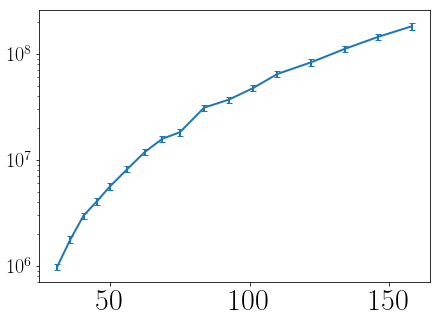

In [13]:
plt.errorbar(radii, mfpts, yerr=errors)
plt.yscale('log')

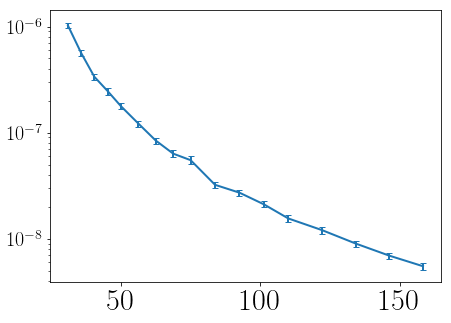

In [12]:
plt.errorbar(radii, kon, yerr=kon_err)
plt.yscale('log')

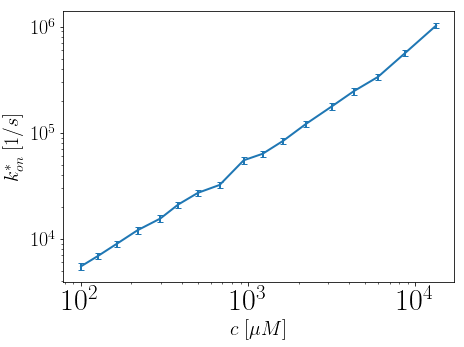

In [26]:
# convert from 1/ps to 1/s
plt.errorbar(c, kon*1e12, yerr=kon_err*1e12)
plt.ylabel('$k^{*}_{on}~[1/s]$')
plt.xlabel('$c~[\mu M]$')
plt.yscale('log')
plt.xscale('log')
#plt.savefig('../Paper/figs/myoglobin/onRateMyoglobin.pdf', bbox_inches='tight')

# Check rate from finite differences

In [16]:
rate = np.diff(kon)/np.diff(c)*1e12 #1/(mu M s)
rate_err = (kon_err[1:] + kon_err[:-1])/np.diff(c)*1e12

In [17]:
print rate_err, rate

[-21.66899885 -22.40511014 -24.4101177  -28.64859843 -21.55648536
 -21.82292807 -24.54720283 -32.62828442 -25.51273323 -23.69455472
 -27.92038534 -29.87045622 -25.11839975 -27.63451025 -29.08184464
 -33.52486257] [ 99.56590379  84.19672134  52.9561716   62.01591536  59.17416078
  62.322616    51.59760365  29.76781224  85.98520789  29.03340288
  50.96477066  66.13822128  43.35182752  56.66144803  55.71436994
  52.69885468]


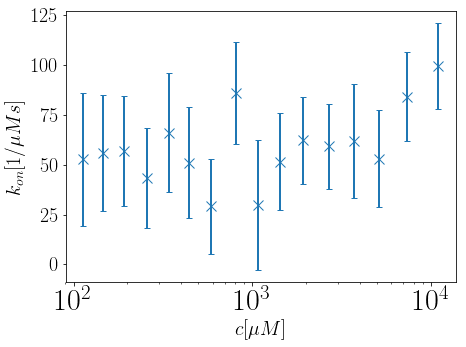

In [18]:
plt.errorbar((c[1:]+c[:-1])/2., rate, yerr=rate_err, fmt='x')
plt.xscale('log')
plt.xlabel('$c [\mu M]$')
plt.ylabel('$k_{on} [1/ \mu M s]$')
#plt.savefig('../Paper/figs/myoglobin/reactionRate.pdf', bbox_inches='tight')

In [19]:
print np.mean(rate), np.std(rate)
#This is also in correspondence to what we find using the linear fit method

58.8840629768 18.1810575695


# Use linear fit instead of finite differences (final version)

In [ ]:
from scipy import optimize

In [15]:
fitfunc = lambda p, x: p[0] + p[1]*x
# Scale point with 1/err to obtain an error estimate
errfunc = lambda p, x, y, err: (y-fitfunc(p, x))/err
out = optimize.leastsq(errfunc, [-2000, 200], args=(c, kon*1e12, 2*kon_err*1e12), full_output=1)

In [49]:
fitfunc2 = lambda p, x: p[0]*x
# Scale point with 1/err to obtain an error estimate
errfunc2 = lambda p, x, y, err: (y-fitfunc2(p, x))/err
out2 = optimize.leastsq(errfunc2, [45], args=(c, kon*1e12, 2*kon_err*1e12), full_output=1)

In [44]:
print out2[0], out2[1]

[ 53.72015483] [[ 3.27942872]]


In [16]:
covar = out[1]
params = out[0]
print out[0]
print covar

[ 1438.5928831     45.21741199]
[[  3.77778158e+05  -7.11934339e+02]
 [ -7.11934339e+02   3.98133944e+00]]


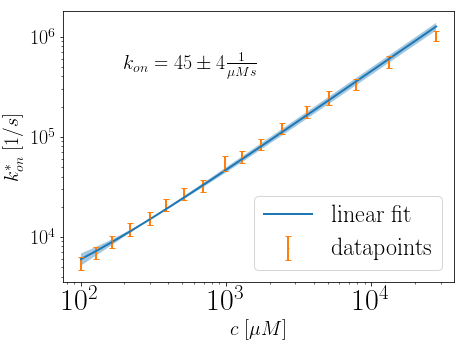

In [17]:
#plt.plot(c, (slope[0]*c+slope[1]), label='linear fit')
#plt.plot(c, (out[0][1]*c+out[0][0]), label='linear error fit')
plt.plot(c, params[1]*c + params[0], label='linear fit')
plt.fill_between(c, (params[1]+2*np.sqrt(covar[1][1]))*c + (params[0]-2*np.sqrt(covar[0][0])), (params[1]-2*np.sqrt(covar[1][1]))*c + (params[0]+2*np.sqrt(covar[0][0])), alpha=0.4)
plt.errorbar(c, kon*1e12, yerr=2*kon_err*1e12, label='datapoints', fmt='.', markersize=1)
plt.ylabel('$k^{*}_{on}~[1/s]$')
plt.xlabel('$c~[\mu M]$')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=4)
plt.text(200, 4*1e5, '$k_{on} = %0.0f \pm %0.0f \\frac{1}{\mu M s}$'%(params[1], 2*np.sqrt(covar[1][1])), fontsize=20)
#plt.savefig('../Paper/figs/myoglobin/reactionRateFit_pbc.pdf', bbox_inches='tight')

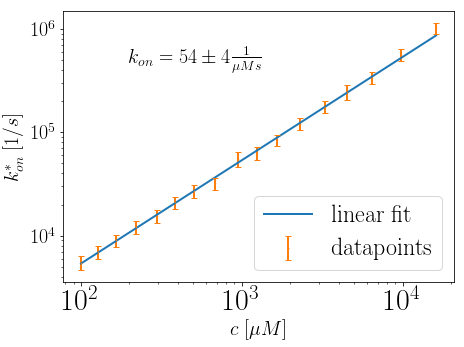

In [50]:
#plt.plot(c, (slope[0]*c+slope[1]), label='linear fit')
#plt.plot(c, (out[0][1]*c+out[0][0]), label='linear error fit')
plt.plot(c, out2[0]*c, label='linear fit')
#plt.fill_between(c, (params[1]+2*np.sqrt(covar[1][1]))*c + (params[0]-2*np.sqrt(covar[0][0])), (params[1]-2*np.sqrt(covar[1][1]))*c + (params[0]+2*np.sqrt(covar[0][0])), alpha=0.4)
plt.errorbar(c, kon*1e12, yerr=2*kon_err*1e12, label='datapoints', fmt='.', markersize=1)
plt.ylabel('$k^{*}_{on}~[1/s]$')
plt.xlabel('$c~[\mu M]$')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=4)
plt.text(200, 4*1e5, '$k_{on} = %0.0f \pm %0.0f \\frac{1}{\mu M s}$'%(out2[0], 2*np.sqrt(covar[1][1])), fontsize=20)
#plt.savefig('../Paper/figs/myoglobin/reactionRateFit_pbc.pdf', bbox_inches='tight')

In [53]:
print kon[0]/c[0]*1e12

63.4446187833


# off rate

In [6]:
fpt_off = pickle.load(open("/group/ag_cmb/scratch/dibakma/MSMRD/myoglobin/rates/fpts_off10000_runs_lag150_eps0.33_240partitions_lcs_rad25_fixed_rerun.p", 'r'))

In [7]:
print np.mean(fpt_off)
print 1/np.mean(fpt_off)*1e6

52094.927
19.1957270619


In [8]:
# use std error as confidence estimate
# rounds up to 0.2
print np.std(fpt_off)/(100*np.mean(fpt_off)**2)*1e6

0.157584242684


In [41]:
22000.**(1/3.)*3./4./np.pi

6.689376153175658

In [6]:
class truncTrajsModelMyoglobin(object):    
    def __init__(self, entryTrajsStart, entryTrajsEnd, entryTimes, exitTrajs, exitTimes, exitProbs, MSMtime, tmatrix, numPartitions, interactionRadius, TStimestep, description=None):
        self.entryTrajsStart = entryTrajsStart
        self.entryTrajsEnd = entryTrajsEnd
        self.entryTimes = entryTimes
        self.exitTrajs = exitTrajs
        self.exitTimes = exitTimes
        self.exitProbs = exitProbs
        self.tmatrix = tmatrix
        self.MSMtimestep = MSMtime
        self.numPartitions = numPartitions
        self.interactionRadius = interactionRadius
        self.TStimestep = TStimestep
        self.description = description

In [7]:
truncTrajsModel = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/models/myoglobin/myoglobin_lag150_240partitions_min200_eps0.33_lcs_rad25_fixed.p', 'r'))

In [11]:
for i in range(240):
    for end in truncTrajsModel.entryTrajsEnd[i]:
        if not isinstance(end, np.ndarray):
           if end == 10:
            print end

10
10
10
10
10
